## 선형대수학의 기울이기 변환: 전단(Shear)

전단(또는 층밀림)은 특정 축(또는 선)에 있는 점들은 고정시킨 채, 그 축에서 떨어진 점들을 축에 평행한 방향으로 밀어내는 선형 변환이다. 이 변환의 가장 큰 특징은 **도형의 넓이는 유지하면서 모양만 기울어지게 만든다**는 점이다. 이는 전단 변환 행렬의 행렬식(Determinant) 값이 항상 1이기 때문이다.

### 전단 행렬(Shear Matrix)

2차원 공간에서 전단 변환은 보통 다음 두 가지 형태로 나타난다.

1.  **수평 전단(Horizontal Shear)**: x축을 고정하고, y좌표에 비례하여 점들을 수평으로 민다.
    - 행렬: $\begin{pmatrix} 1 & k \\ 0 & 1 \end{pmatrix}$
    - `k`는 전단 계수(shear factor)로, 기울어지는 정도를 결정한다.

2.  **수직 전단(Vertical Shear)**: y축을 고정하고, x좌표에 비례하여 점들을 수직으로 민다.
    - 행렬: $\begin{pmatrix} 1 & 0 \\ k & 1 \end{pmatrix}$

### 파이썬으로 전단 변환 시각화하기

하나의 사각형에 수평 전단 변환을 적용했을 때 어떻게 모양이 변하는지 시각적으로 확인해본다.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# 시각화를 위한 설정
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

# 변환할 사각형 정의 (네 개의 꼭짓점)
square = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1]
])

# 수평 전단 행렬 정의 (k=1.5)
k = 2.0
shear_matrix = np.array([
    [1, k],
    [0, 1]
])

print(f"변환 전 사각형의 좌표:\n{square}")
print(f"\n수평 전단 행렬 (k={k}):\n{shear_matrix}")

변환 전 사각형의 좌표:
[[0 0]
 [1 0]
 [1 1]
 [0 1]]

수평 전단 행렬 (k=2.0):
[[1. 2.]
 [0. 1.]]


#### 변환 적용 및 시각화

변환 후 사각형의 좌표:
[[0. 0.]
 [1. 0.]
 [3. 1.]
 [2. 1.]]


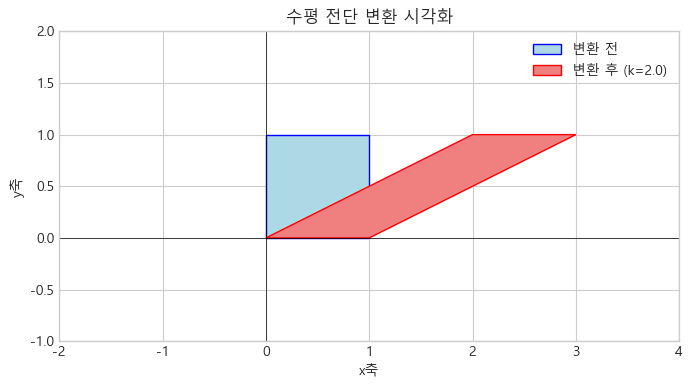

In [8]:
# 전단 변환 적용
# (4, 2) @ (2, 2) -> (4, 2). 각 점이 행벡터이므로 행렬을 뒤에 곱하고 전치(T)한다.
sheared_square = (shear_matrix @ square.T).T

print(f"변환 후 사각형의 좌표:\n{sheared_square}")

# 시각화
plt.figure(figsize=(8, 8))
ax = plt.gca()

# 변환 전/후 도형 그리기
ax.add_patch(Polygon(square, facecolor='lightblue', edgecolor='blue', label='변환 전'))
ax.add_patch(Polygon(sheared_square, facecolor='lightcoral', edgecolor='red', label=f'변환 후 (k={k})'))

# 그래프 설정
ax.set_xlim(-2, 4)
ax.set_ylim(-1, 2)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_title('수평 전단 변환 시각화')
ax.set_xlabel('x축')
ax.set_ylabel('y축')
ax.legend()
ax.grid(True)
ax.set_aspect('equal', adjustable='box')
plt.show()

위 그래프에서 파란색 사각형이 전단 변환을 통해 어떻게 빨간색 평행사변형으로 변하는지 볼 수 있다. x축에 놓인 아래쪽 변은 그대로 고정되어 있지만, y값이 커질수록(위로 갈수록) 점들이 더 많이 오른쪽으로 밀려났다.

#### 행렬식 계산으로 넓이 보존 확인

In [9]:
# 전단 행렬의 행렬식 계산
determinant = np.linalg.det(shear_matrix)

print(f"전단 행렬의 행렬식: {determinant:.1f}")
print("\n행렬식이 1이므로, 이 변환은 도형의 넓이를 보존한다.")

전단 행렬의 행렬식: 1.0

행렬식이 1이므로, 이 변환은 도형의 넓이를 보존한다.


#### 요약

전단은 특정 축을 고정한 채 공간을 기울이는, 넓이가 보존되는 선형 변환이다.

넓이를 유지한 채, 한 축을 기준으로 공간을 평행하게 밀어 기울기는 변환